In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=20)
number_of_samples, height, width = lfw_people.images.shape

person_index = list(lfw_people.target_names).index('Arnold Schwarzenegger')

examples = lfw_people.images[lfw_people.target == person_index]

N = height * width

In [3]:
pca = PCA(n_components=5)
pca.fit(examples.reshape(-1, N))

PCA(n_components=5)

In [4]:
learning_rate = 0.1
tolerance = 1e-10

In [5]:
def Oji(examples):
    weights = np.random.normal(scale=0.25, size=(N, 1))
    previous_weights = np.zeros((N, 1))
    while np.linalg.norm(weights - previous_weights) > tolerance:
        previous_weights = weights.copy()
        for example in examples:
            example = example.reshape(N, 1)
            y = np.dot(weights.T, example)
            weights += learning_rate * (y * example - y ** 2 * weights)
    return weights

In [6]:
def components(examples, number_of_components):
    components = np.zeros((number_of_components, N))

    for k in range(number_of_components):
        weights = Oji(examples)
        components[k] = weights.flatten()
        projections = np.dot(examples, weights) / np.dot(weights.T, weights)
        examples -= projections * weights.T
        examples = normalize(examples)

    return components

In [7]:
input_examples = normalize(examples.reshape(42, -1))
components = components(input_examples, 10)

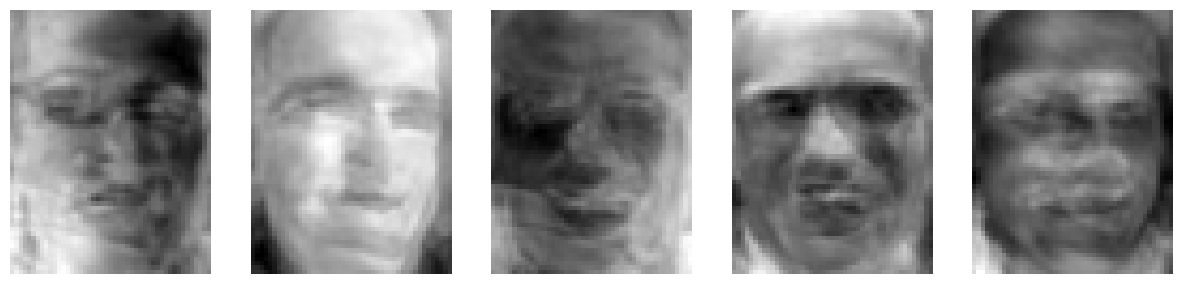

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(15, 10))

for i, ax in enumerate(axes):
    image = pca.components_[i].reshape(height, width)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

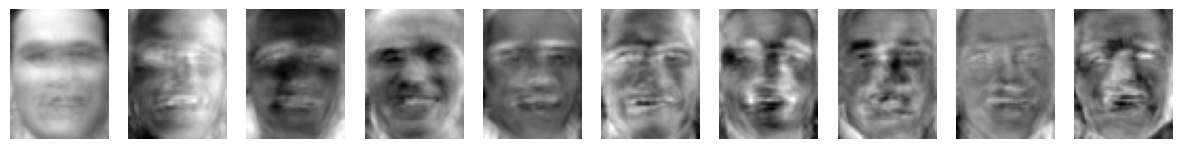

In [9]:
fig, axes = plt.subplots(1, 10, figsize=(15, 10))

for i, ax in enumerate(axes):
    image = components[i].reshape(height, width)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

In [16]:
def reconstruct(examples, number_of_components):
    examples = normalize(examples.reshape(42, -1))[:5]
    images = np.dot(examples, components.T)
    reconstructed = normalize(np.dot(images, components)).reshape(5, height, width)
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))
    
    for i in range(5):
        axes[0, i].imshow(examples[i].reshape(height, width), cmap='gray')
        axes[0, i].axis('off')
    
        axes[1, i].imshow(reconstructed[i].reshape(height, width), cmap='gray')
        axes[1, i].axis('off')

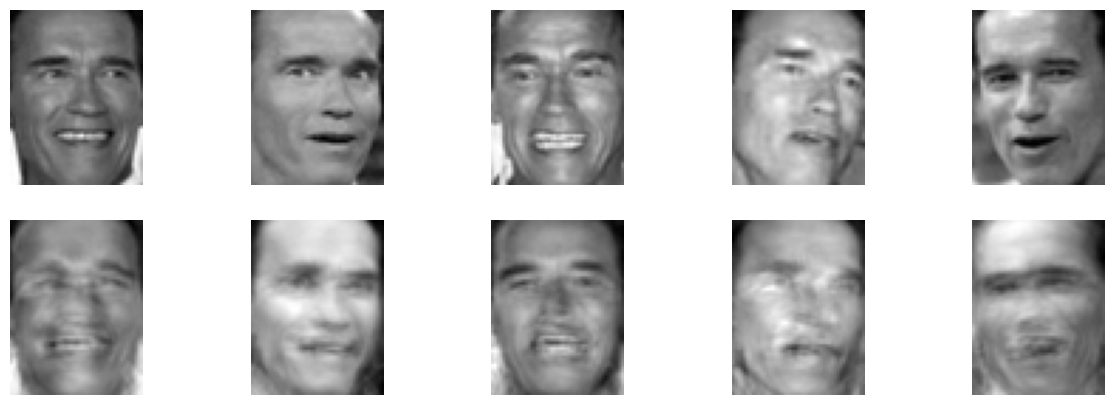

In [17]:
reconstruct(examples.copy(), 10)